# <div style="text-align: center;">EXPERIMENT NO.6</div>

<div style="text-align: right; padding-right: 200px;">
<strong>NAME:</strong> Arumugavel<br>
<strong>ROLL NUMBER:</strong> T001<br>
<strong>DATE:</strong> 16/01/2025
</div>

---

**AIM:** To Implement Blockchain using Merkle Trees<br>
**THEORY:**
Merkle tree also known as hash tree is a data structure used for data verification and synchronization.
It is a tree data structure where each non-leaf node is a hash of it’s child nodes. All the leaf nodes are at the same depth and are as far left as possible.
It maintains data integrity and uses hash functions for this purpose.

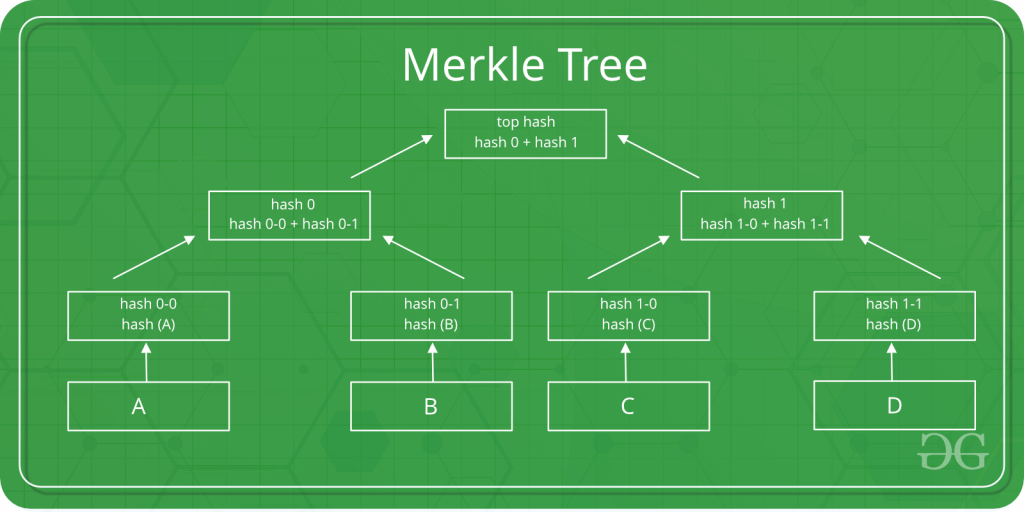

#####This is a binary merkel tree, the top hash is a hash of the entire tree.
* This structure of the tree allows efficient mapping of huge data and
small changes made to the data can be easily identified.
* If we want to know where data change has occurred then we can check if data is consistent with root hash and we will not have to traverse the whole structure but only a small part of the structure.
* The root hash is used as the fingerprint for the entire data.

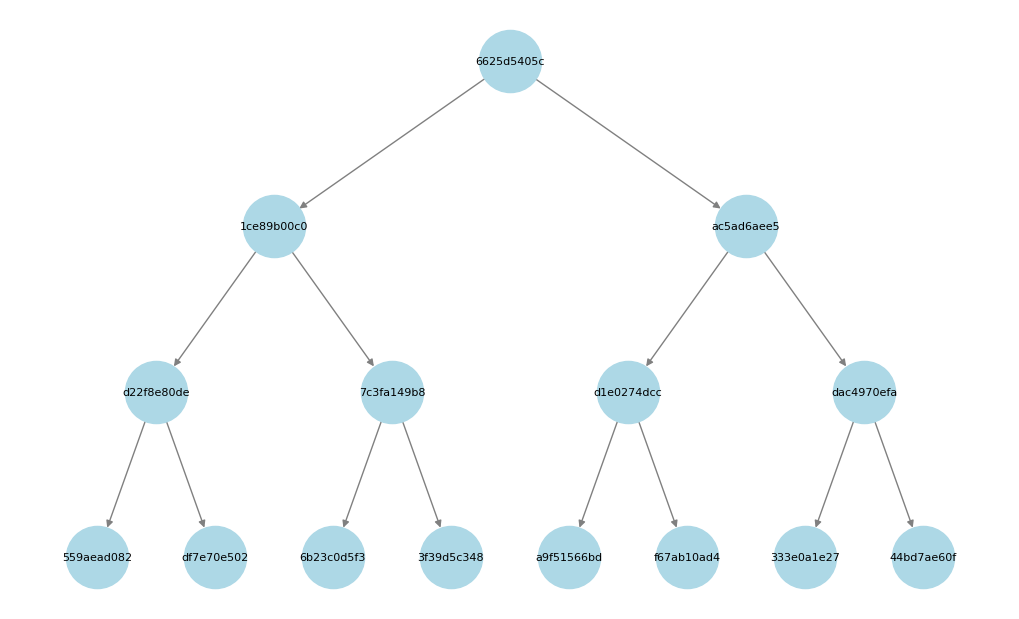

In [ ]:
import hashlib
import networkx as nx
import matplotlib.pyplot as plt

class MerkleNode:
    def __init__(self, left=None, right=None, data=None):
        if data is not None:
            self.hash = self.calculate_hash(data)
        else:
            self.hash = self.calculate_hash(left.hash + right.hash)
        self.left = left
        self.right = right

    @staticmethod
    def calculate_hash(data):
        return hashlib.sha256(data.encode()).hexdigest()[:10]  # Only first 5 characters

def build_merkle_tree(leaf_data):
    nodes = [MerkleNode(data=data) for data in leaf_data]
    while len(nodes) > 1:
        temp = []
        for i in range(0, len(nodes), 2):
            if i + 1 < len(nodes):
                temp.append(MerkleNode(left=nodes[i], right=nodes[i + 1]))
            else:
                temp.append(nodes[i])
        nodes = temp
    return nodes[0]

def add_edges(graph, node, pos, x=0, y=0, level=1, width=2.0):
    if node is None:
        return

    graph.add_node(node.hash)
    pos[node.hash] = (x, -y)
    if node.left:
        graph.add_edge(node.hash, node.left.hash)
        add_edges(graph, node.left, pos, x - width / (2 ** level), y + 1, level + 1, width)
    if node.right:
        graph.add_edge(node.hash, node.right.hash)
        add_edges(graph, node.right, pos, x + width / (2 ** level), y + 1, level + 1, width)

def draw_merkle_tree(leaf_data):
    root = build_merkle_tree(leaf_data)
    tree = nx.DiGraph()
    pos = {}
    add_edges(tree, root, pos)

    plt.figure(figsize=(10, 6))
    nx.draw(tree, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", font_size=8)
    plt.show()

# Example leaf data
draw_merkle_tree(["A", "B", "C", "D", "E", "F", "G", "H"])

### **Conclusion**  
With this experiment, we learned about the Merkle Tree and its role in blockchain technology. We implemented it using Python and explored how it helps in efficiently verifying and securing transactions within a block. Understanding the Merkle Tree has provided us with insights into how blockchain ensures data integrity and tamper resistance while optimizing storage and verification processes.  

### **Questions:**  

1. **What is a Merkle Tree?**  
   **Ans.** A Merkle Tree is a binary tree structure in which each leaf node contains a cryptographic hash of transaction data, and each non-leaf node contains a hash of its child nodes. It helps in efficiently verifying large sets of data.  

2. **Why is it important in Blockchain?**  
   **Ans.** The Merkle Tree is crucial in blockchain because it enables quick and secure verification of transactions without requiring the entire dataset. It ensures data integrity and reduces the storage requirements for full node validation.  

3. **What are the key advantages and disadvantages of the Merkle Tree?**  
   **Ans.**  
   - **Advantages:**
        - Reduced Storage Requirements: Instead of storing all transactions, nodes can store only the Merkle Root, significantly reducing storage demands.
        - Tamper Detection: Any change to a transaction would propagate through the tree, altering the Merkle Root and making unauthorized modifications evident.
        - Improved Scalability: The hierarchical structure enables blockchain networks to handle large volumes of transactions efficiently.
   - **Disadvantages:**
        - Computational Overhead: Constructing a Merkle Tree involves multiple cryptographic hash computations, which can add computational complexity, especially for large datasets.
        - Hash Function Dependence: The security of the Merkle Tree depends on the strength of the hash function used. If the hash function is weak or compromised, it could lead to vulnerabilities in transaction verification.

4. **Explain the working of Merkle Tree.**
**Ans.**
A **Merkle Tree** (or hash tree) is a data structure used in cryptography and blockchain technology to efficiently verify data integrity. It organizes data into a tree structure where each leaf node contains a hash of data, and each non-leaf node contains the hash of its child nodes.  
 **How a Merkle Tree Works**  
1. **Leaf Node Hashing**  
    - The raw data (e.g., transactions in a blockchain) is hashed using a cryptographic hash function (like SHA-256).  
    - These hashes become the **leaf nodes** of the tree.
     
2. **Pairwise Hashing**  
    - Adjacent leaf nodes are combined and hashed together to form parent nodes.  
    - This process continues until a single hash remains at the top, known as the **Merkle Root**.  

3. **Merkle Root**  
    - The Merkle Root is a single hash that represents the entire dataset.  
    - Any change in the data alters the Merkle Root, making tampering easy to detect.




